### Importation des librairies

In [81]:
import pandas as pd
import numpy as np
import matplotlib as mat
import seaborn as sea
import math
import scipy
import sklearn as skn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Importation du dataset

In [55]:
earthquake = pd.read_csv("earthquake.csv")

### Exploration du dataset

In [56]:
earthquake.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [57]:
earthquake.tail()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0
24006,2.020000e+13,2017.04.05,12:25:25 AM,38.63,27.58,turkey,manisa,cavusoglu,NaN,NaN,9.0,3.5,0.0,3.4,3.5,0.0,0.0


In [58]:
earthquake.shape

(24007, 17)

In [59]:
earthquake.drop(['dist','id','time','lat','long','country','city','area','direction','mw','ms','mb'], axis='columns', inplace=True)

In [60]:
earthquake = earthquake[earthquake.depth != 0] 
earthquake = earthquake[earthquake.xm != 0] 
earthquake = earthquake[earthquake.md != 0] 
earthquake = earthquake[earthquake.richter != 0] 

In [61]:
earthquake.head()

,date,depth,xm,md,richter
1,2007.08.01,5.2,4.0,3.8,4.0
20,1966.08.19,14.0,5.0,4.7,4.7
27,1966.08.19,50.0,5.0,4.7,4.7
28,1966.12.30,31.0,4.5,4.3,4.3
29,1967.05.22,54.0,4.9,4.7,4.6


Le dataset est omposé de 24007 lignes sur 17 colonnes.
Parmis ces 17 colonnes je n'en garderais que ? qui sont: 

date, depth(depth of earthquake), xm, md(Durée), richter(magitude). 
je drop les autres colonnes car elles sont soit inutilisable dans le cadre de cette problèmatique soit ne contienne pas suffisament d'information.

In [62]:
earthquake.isna().sum()

date       0
depth      0
xm         0
md         0
richter    0
dtype: int64

In [63]:
earthquake.shape

(3557, 5)

In [64]:
earthquake.dtypes

date        object
depth      float64
xm         float64
md         float64
richter    float64
dtype: object

In [65]:
earthquake['date'] = pd.to_datetime(earthquake['date'])

In [66]:
earthquake.describe()

,depth,xm,md,richter
count,3557.000000,3557.000000,3557.000000,3557.000000
mean,31.003430,4.794968,4.606466,4.595193
std,27.231561,0.632224,0.571780,0.554410
min,1.000000,3.500000,3.000000,3.100000
25%,10.000000,4.400000,4.200000,4.200000
50%,26.000000,4.800000,4.700000,4.600000
75%,40.000000,5.200000,5.000000,4.900000
max,225.000000,7.900000,7.200000,7.200000


Ce tableau présente les moyennes, ecarts-type, minimum, quartiles et maximum pour chaque variable numérique étudiée.

### Distribution des variables d'intérêt

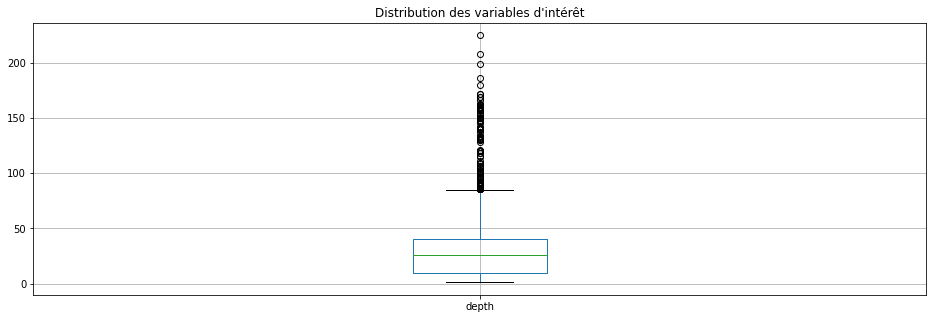

In [67]:
plt.figure(figsize=(16,5))
plt.title("Distribution des variables d'intérêt")
earthquake.boxplot(column='depth')
plt.show()

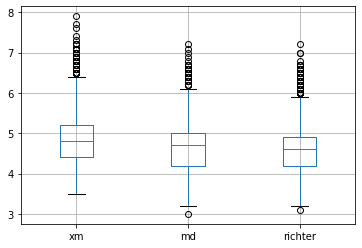

In [68]:
earthquake.boxplot(column=['xm','md','richter'])
plt.show()

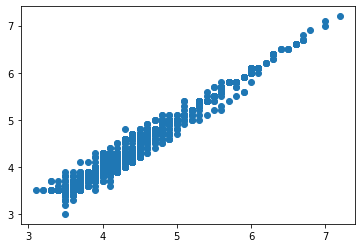

In [70]:
plt.scatter(earthquake['richter'],earthquake['md'])

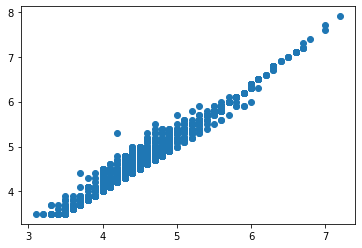

In [92]:
plt.scatter(earthquake['richter'],earthquake['xm'])

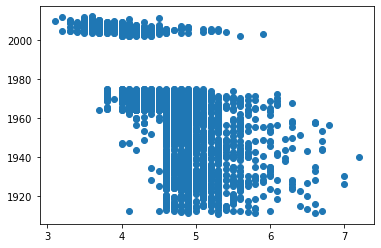

In [73]:
plt.scatter(earthquake['richter'],earthquake['date'])

### HeatMap Correlation

<AxesSubplot:>

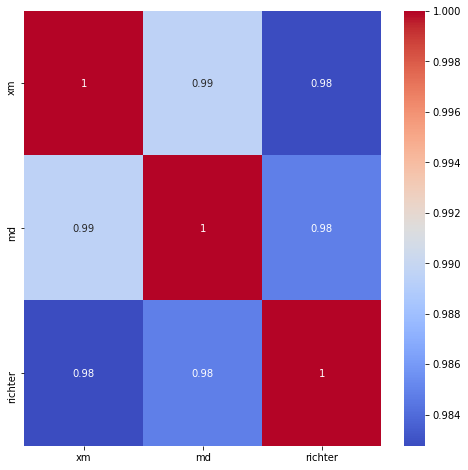

In [99]:
dataStorecorr = earthquake[['xm', 'md','richter']]
dataStorecorr.corr()
plt.figure(figsize = (8, 8))
sea.heatmap(dataStorecorr.corr(), annot = True, cmap = "coolwarm")

### Affichage des coefficients/ accuracy

In [86]:
X = earthquake[['xm','md']]
Y = earthquake["richter"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
modelrank = LinearRegression()
modelrank.fit(X_train,y_train)

LinearRegression()

In [87]:
modelrank.score(X_test,y_test)*100

97.26085947810508